In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Load the data and store into a dataframe; display some basic info about the data

In [2]:
df = pd.read_csv('RunningBlueCard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Last Name          376 non-null    object
 1   First Name         376 non-null    object
 2   Gender             376 non-null    object
 3   MS Level           375 non-null    object
 4   School             376 non-null    object
 5   Company            376 non-null    object
 6   Platoon            376 non-null    int64 
 7   Squad              376 non-null    int64 
 8   RatedPos           376 non-null    object
 9   OverallAssessment  376 non-null    object
 10  Rater              375 non-null    object
 11  Sustain 1          368 non-null    object
 12  Sustain 2          334 non-null    object
 13  Sustain 3          188 non-null    object
 14  Improve 1          318 non-null    object
 15  Improve 2          185 non-null    object
 16  Improve 3          58 non-null     object
dt

In [3]:
df.head()

,Last Name,First Name,Gender,MS Level,School,Company,Platoon,Squad,RatedPos,OverallAssessment,Rater,Sustain 1,Sustain 2,Sustain 3,Improve 1,Improve 2,Improve 3
0,Lovell,Tatianna,F,III,GSOU,A,1,1,PL,P,CPT Picciano,BT,MA,NaN,CO,EX,NaN
1,Fields,"Ky’Lee, M",F,III,GSOU,A,1,1,PSG,C,SFC Weaver,IN,DP,NaN,EX,IT,NaN
2,Williams,Jesse A,M,III,GSOU,A,1,1,PL,E,CPT Picciano,DO,LD,SJ,NaN,NaN,NaN
3,Velazquez Rivera,Uriel,M,III,UF,A,1,1,PSG,C,SFC Weaver,CO,BT,NaN,EX,SJ,NaN
4,Richardson Smith,Malik,M,III,GSU,A,1,1,PL,P,CPT Picciano,MA,NaN,NaN,DO,EX,NaN


<h3> Data Cleaning

In [4]:
#df = df.drop(['Brevities', 'Unnamed: 13', 'Unnamed: 15', 'Positions', 'Raters'], axis=1)
#df.head()

<h3> Create Filters for Schools

In [5]:
### Filter cadets per school
df_GSOU = df[df.School == 'GSOU'] # 1. Georgia Southern
df_UF = df[df.School == 'UF']
df_FVSU = df[df.School == 'FVSU']
df_UGA = df[df.School == 'UGA']
df_GTECH = df[df.School == 'GTECH']
df_UNA = df[df.School == 'UNA']
df_AU = df[df.School == 'AU']
df_GSU = df[df.School == 'GSU']

<h3> Overall Assessment Section

In [6]:
### Count the number of cadets in each school
n = df['School'].value_counts()
n

GSOU     98
UF       69
GSU      53
GTECH    37
UGA      36
FVSU     34
AU       33
UNA      16
Name: School, dtype: int64

In [7]:
# Display the Assessment occurrences
total_grades = df['OverallAssessment'].value_counts()
total_grades=total_grades[['E','P','C','U']] # Add 'U' back in once there is one
total_grades

E     86
P    211
C     76
U      3
Name: OverallAssessment, dtype: int64

Text(0, 0.5, 'Quantity')

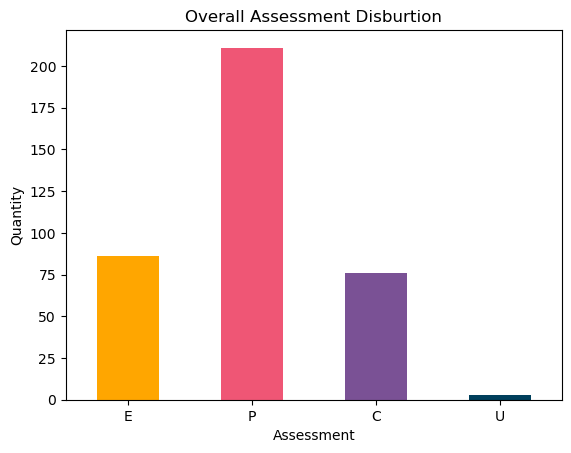

In [8]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
total_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Overall Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [9]:
#Position v Grade
pos_grades = df.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C','U']] # add 'U'
#pos_grades

In [10]:
#Grade v Position
grades_pos = df.groupby('OverallAssessment')['RatedPos'].value_counts()
grades_pos = grades_pos.unstack(level=1)
grades_pos = grades_pos.reindex(['E','P','C','U'])
grades_pos

RatedPos,PL,PSG,SL
OverallAssessment,,,
E,22.0,23.0,41.0
P,40.0,48.0,123.0
C,19.0,12.0,45.0
U,1.0,2.0,NaN


In [11]:
E_total = grades_pos.loc['E'].sum()
E_series = grades_pos.loc['E']
E_per = E_series/E_total

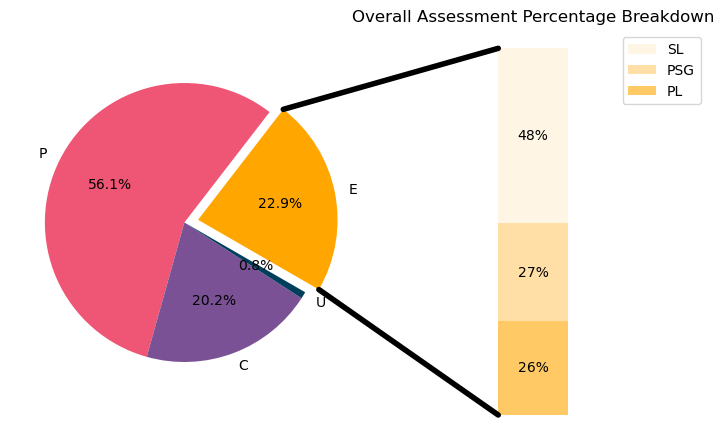

In [12]:
from matplotlib.patches import ConnectionPatch

grades = total_grades
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
labels = ['E', 'P', 'C','U']
explode = [0.1, 0, 0,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * grades[0]
wedges, *_ = ax1.pie(grades, autopct='%1.1f%%',colors = colors, startangle=330,
                     labels=grades.index, explode=explode)

# bar chart parameters
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(E_per, E_series.index)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='#ffa600', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Overall Assessment Percentage Breakdown")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(E_per)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

Text(0.5, 1.0, 'Assessments by School')

<Figure size 2500x500 with 0 Axes>

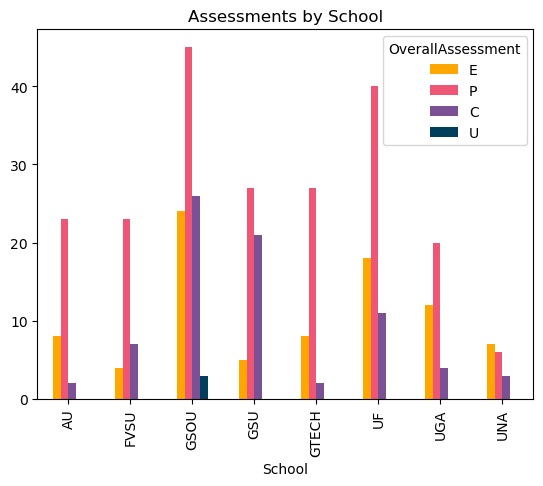

In [126]:
school_grades = df.groupby('School')['OverallAssessment'].value_counts()
school_grades = school_grades.unstack(level=1)
school_grades = school_grades[['E','P','C','U']]
school_grades
plt.figure(figsize=(25,5))
school_grades.plot(kind='bar', color = colors)

plt.title('Assessments by School')

In [14]:
school_grades = school_grades.fillna(0)
school_grades['Sum'] = school_grades.sum(axis=1)
school_grades

OverallAssessment,E,P,C,U,Sum
School,,,,,
AU,8.0,23.0,2.0,0.0,33.0
FVSU,4.0,23.0,7.0,0.0,34.0
GSOU,24.0,45.0,26.0,3.0,98.0
GSU,5.0,27.0,21.0,0.0,53.0
GTECH,8.0,27.0,2.0,0.0,37.0
UF,18.0,40.0,11.0,0.0,69.0
UGA,12.0,20.0,4.0,0.0,36.0
UNA,7.0,6.0,3.0,0.0,16.0


In [15]:
school_grades = (school_grades.div(school_grades['Sum'],axis = 0) * 100)
school_grades

OverallAssessment,E,P,C,U,Sum
School,,,,,
AU,24.242424,69.696970,6.060606,0.000000,100.0
FVSU,11.764706,67.647059,20.588235,0.000000,100.0
GSOU,24.489796,45.918367,26.530612,3.061224,100.0
GSU,9.433962,50.943396,39.622642,0.000000,100.0
GTECH,21.621622,72.972973,5.405405,0.000000,100.0
UF,26.086957,57.971014,15.942029,0.000000,100.0
UGA,33.333333,55.555556,11.111111,0.000000,100.0
UNA,43.750000,37.500000,18.750000,0.000000,100.0


In [16]:
school_grades = school_grades.drop(['Sum'], axis=1)

In [17]:
school_grades = school_grades.T
school_grades

School,AU,FVSU,GSOU,GSU,GTECH,UF,UGA,UNA
OverallAssessment,,,,,,,,
E,24.242424,11.764706,24.489796,9.433962,21.621622,26.086957,33.333333,43.75
P,69.696970,67.647059,45.918367,50.943396,72.972973,57.971014,55.555556,37.50
C,6.060606,20.588235,26.530612,39.622642,5.405405,15.942029,11.111111,18.75
U,0.000000,0.000000,3.061224,0.000000,0.000000,0.000000,0.000000,0.00


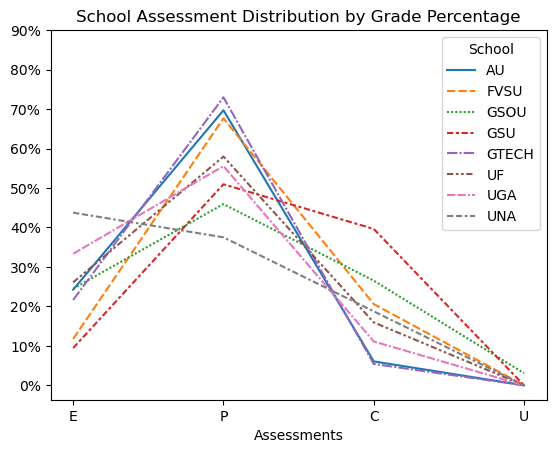

In [18]:
school_line = sns.lineplot(data = school_grades);
school_line.set_yticks([0,10,20,30,40,50,60,70,80,90]);
#school_line.set_yticks(range(6))
school_line.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%']);
school_line.set(xlabel = 'Assessments', title = 'School Assessment Distribution by Grade Percentage');


In [19]:
#Organizing Assessments by school
GSOU_grades = df_GSOU['OverallAssessment'].value_counts()
GSOU_grades = GSOU_grades[['E','P','C','U']]

UF_grades = df_UF['OverallAssessment'].value_counts()
UF_grades = UF_grades[['E','P','C']] # Add 'U' back in once there is one

FVSU_grades = df_FVSU['OverallAssessment'].value_counts()
FVSU_grades = FVSU_grades[['E','P','C']] # Add 'U' back in once there is one

UGA_grades = df_UGA['OverallAssessment'].value_counts()
UGA_grades = UGA_grades[['E','P','C']] # Add 'U' back in once there is one

GTECH_grades = df_GTECH['OverallAssessment'].value_counts()
GTECH_grades = GTECH_grades[['E','P','C']] # Add 'U' back in once there is one

UNA_grades = df_UNA['OverallAssessment'].value_counts()
UNA_grades = UNA_grades[['E','P','C']] # Add 'U' back in once there is one

AU_grades = df_AU['OverallAssessment'].value_counts()
AU_grades = AU_grades[['E','P','C']] # Add 'U' back in once there is one

GSU_grades = df_GSU['OverallAssessment'].value_counts()
GSU_grades = GSU_grades[['E','P','C']] # Add 'U' back in once there is one


colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

#Displaying grade distributions into pi charts
#fig, GBS = plt.subplots(1, 3, figsize=(25, 5))  #GBS = Grade By School || Update the number when adding additional plots
#fig.suptitle('Grade Distribution by School')
#total_grades.plot.pie(ylabel='Total', autopct='%1.1f%%', ax=GBS[0], colors = colors)
#GSOU_grades.plot.pie(ylabel='GSOU', autopct='%1.1f%%', ax=GBS[1], colors = colors)
#UF_grades.plot.pie(ylabel='UF', autopct='%1.1f%%', ax=GBS[2], colors = colors)

In [20]:
#fig, GBS = plt.subplots(1, 3, figsize=(25, 5))  #GBS = Grade By School || Update the number when adding additional plots
#fig.suptitle('Grade Distribution by School')
#FVSU_grades.plot.pie(ylabel='FVSU', autopct='%1.1f%%', ax=GBS[0], colors = colors)
#UGA_grades.plot.pie(ylabel='UGA', autopct='%1.1f%%', ax=GBS[1], colors = colors)
#GTECH_grades.plot.pie(ylabel='GTECH', autopct='%1.1f%%', ax=GBS[2], colors = colors)

In [21]:
#fig, GBS = plt.subplots(1, 3, figsize=(25, 5))  #GBS = Grade By School || Update the number when adding additional plots
#fig.suptitle('Grade Distribution by School')
#UNA_grades.plot.pie(ylabel='UNA', autopct='%1.1f%%', ax=GBS[0], colors = colors)
#AU_grades.plot.pie(ylabel='AU', autopct='%1.1f%%', ax=GBS[1], colors = colors)
#GSU_grades.plot.pie(ylabel='GSU', autopct='%1.1f%%', ax=GBS[2], colors = colors)

In [22]:
#Organizing Assessments based on MS Level
#MS1_grades = df[df['MS Level'] == 'I']['OverallAssessment'].value_counts()
#MS1_grades = MS1_grades[['E','P','C']] # test 'U'

#MS2_grades = df[df['MS Level'] == 'II']['OverallAssessment'].value_counts()
#MS2_grades = MS2_grades[['P','C']] # test 'E', 'U'

#MS3_grades = df[df['MS Level'] == 'III']['OverallAssessment'].value_counts()
#MS3_grades = MS3_grades[['E','P','C','U']]

#Displaying grade distributions into pi chars
#fig, GBL = plt.subplots(1, 3, figsize=(25, 5))  #GBL = Grade By Level
#fig.suptitle('Grade Distribution by Level')
#MS1_grades.plot.pie(ylabel='MS 1', autopct='%1.1f%%', ax=GBL[0], colors = colors)
#MS2_grades.plot.pie(ylabel='MS 2', autopct='%1.1f%%', ax=GBL[1], colors = colors)
#MS3_grades.plot.pie(ylabel='MS 3', autopct='%1.1f%%', ax=GBL[2], colors = colors)

In [23]:
#fig, GBP = plt.subplots(1, 2, figsize=(25, 5))  #GBP = Grade By Position
#fig.suptitle('Grade Distribution by Position')
#pos_grades.plot.bar(xlabel='POSITION', ax=GBP[0], rot = 0,color = colors,grid = True) #Position v Grade
#grades_pos.plot.bar(xlabel='GRADE', ax=GBP[1], rot = 0, color = colors,grid = True) #Grade v Position

In [24]:
#Grades by Rater
### Need to filter by position because the combined graph is too dense
rater_grades = df.groupby('Rater')['OverallAssessment'].value_counts()
rater_grades = rater_grades.unstack(level=1)
rater_grades = rater_grades[['E','P','C','U']]
#rater_grades.plot(kind='barh', rot = 45,color = colors, title = 'Rater Assessments', grid = True );


In [25]:
PL_filter = df[df.RatedPos == 'PL'].reset_index()
PSG_filter = df[df.RatedPos == 'PSG'].reset_index()
SL_filter = df[df.RatedPos == 'SL'].reset_index()

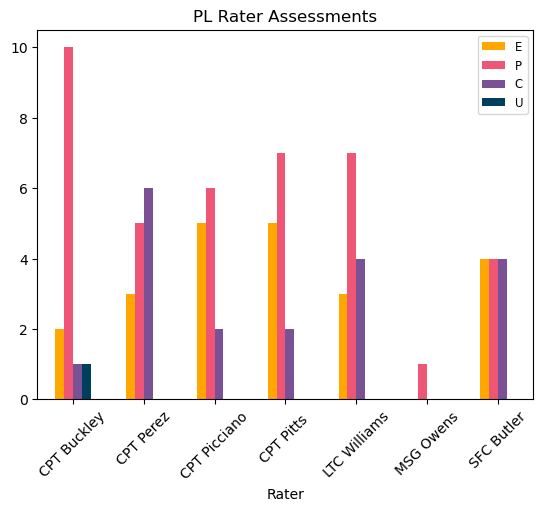

In [26]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
PL_rater_grades = PL_filter.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
PL_rater_grades = PL_rater_grades[['E','P','C','U']]
PL_rater_grades.plot(kind='bar', rot = 45,color = colors, title = 'PL Rater Assessments');

plt.legend(loc = 'upper right',fontsize='small')

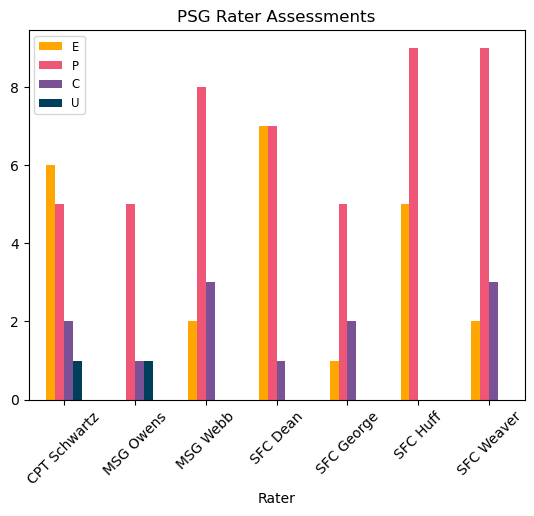

In [27]:
PSG_rater_grades = PSG_filter.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
PSG_rater_grades = PSG_rater_grades[['E','P','C','U']]
PSG_rater_grades.plot(kind='bar', rot = 45,color = colors, title = 'PSG Rater Assessments');
plt.legend(loc = 'upper left',fontsize='small')

<Figure size 5000x500 with 0 Axes>

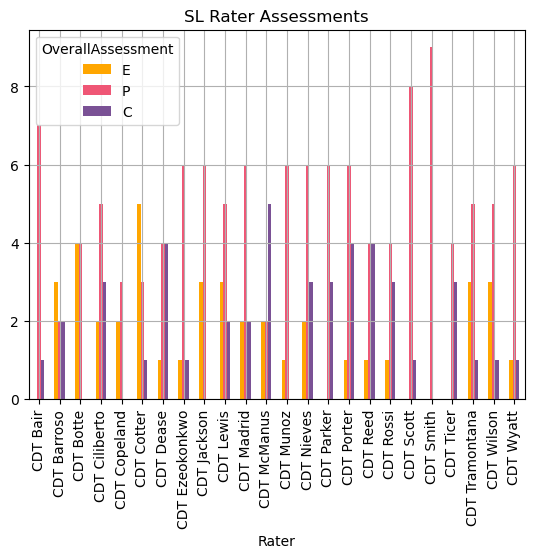

<Figure size 5000x500 with 0 Axes>

In [28]:

SL_rater_grades = SL_filter.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
SL_rater_grades = SL_rater_grades[['E','P','C']]
SL_rater_grades.plot(kind='bar', rot = 90,color = colors, title = 'SL Rater Assessments', grid = True );
plt.figure(figsize=(50,5))

In [29]:
# Filter SL Grades by Company
A_SL_filter = SL_filter[SL_filter.Company == 'A']
B_SL_filter = SL_filter[SL_filter.Company == 'B']

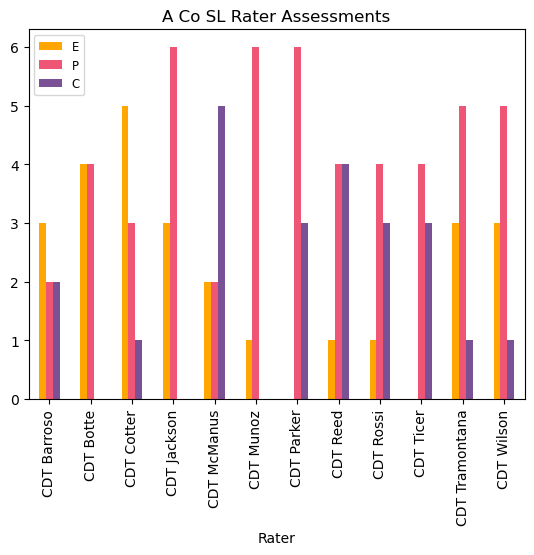

In [30]:
# A Co
A_SL_rater_grades = A_SL_filter.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
A_SL_rater_grades = A_SL_rater_grades[['E','P','C']]
A_SL_rater_grades.plot(kind='bar', rot = 90,color = colors, title = 'A Co SL Rater Assessments');
#plt.figure(figsize=(50,5))
plt.legend(loc = 'upper left',fontsize='small')

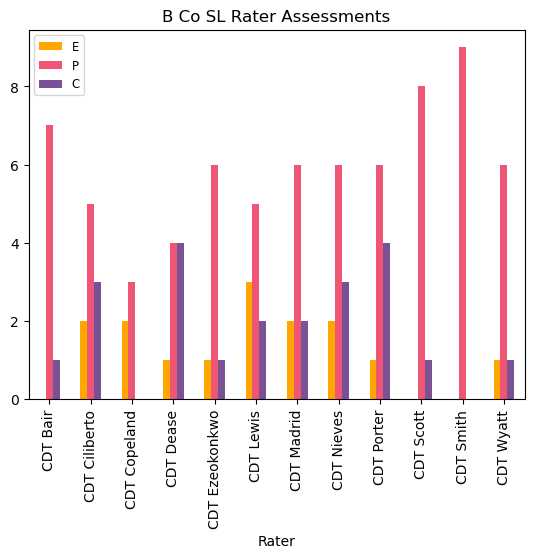

In [31]:
# B Co

B_SL_rater_grades = B_SL_filter.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
B_SL_rater_grades = B_SL_rater_grades[['E','P','C']]
B_SL_rater_grades.plot(kind='bar', rot = 90,color = colors, title = 'B Co SL Rater Assessments');
#plt.figure(figsize=(50,5))
plt.legend(loc = 'upper left',fontsize='small')

<Figure size 800x600 with 0 Axes>

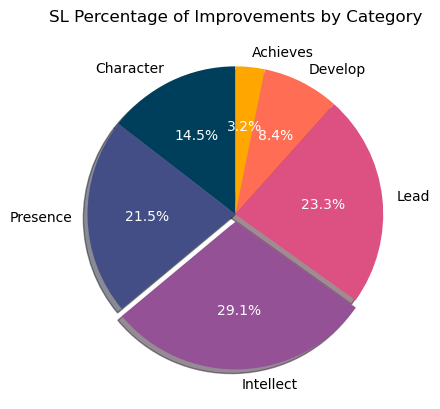

In [32]:
Sus1 = SL_filter['Sustain 1']
Sus2 = SL_filter['Sustain 2']
Sus3 = SL_filter['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = SL_filter['Improve 1']
Imp2 = SL_filter['Improve 2']
Imp3 = SL_filter['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)
Character_Imp_count = (Imp=='AV').sum() + (Imp=='EM').sum() + (Imp=='WE').sum() + (Imp=='DP').sum() + (Imp=='HU').sum()
Presence_Imp_count = (Imp=='MB').sum() + (Imp=='FT').sum() + (Imp=='CF').sum() + (Imp=='RS').sum()
Intellect_Imp_count = (Imp=='MA').sum() + (Imp=='SJ').sum() + (Imp=='IN').sum() + (Imp=='IT').sum() + (Imp=='EX').sum()
Lead_Imp_count = (Imp=='LD').sum() + (Imp=='BT').sum() + (Imp=='EI').sum() + (Imp=='LE').sum() + (Imp=='CO').sum()
Develop_Imp_count = (Imp=='CP').sum() + (Imp=='PS').sum() + (Imp=='DO').sum() + (Imp=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop','Achieves']
imp_counts = [Character_Imp_count,Presence_Imp_count,Intellect_Imp_count,Lead_Imp_count,Develop_Imp_count,Achieves_Imp_count]
imp_df = pd.DataFrame(imp_counts,index = labels, columns = {'Counts'})

plt.figure(figsize=(8,6))
explode = (0,0,0.05,0,0,0)
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(imp_df.Counts,labels = imp_df.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL Percentage of Improvements by Category');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

In [33]:
school_grades.columns

Index(['AU', 'FVSU', 'GSOU', 'GSU', 'GTECH', 'UF', 'UGA', 'UNA'], dtype='object', name='School')

<h3> What are some useful metrics that BN COs might want to see?

1. What were the overall assessments of the FTX? (# of E,P,C,U & percentages) ✅
2. What were the overall assessments of the FTX by school? (# of E,P,C,U & percentages) ✅
3. How did the schools match up against each other? ✅
4. What were the trends in the Sustainments & Improvements by school/position/cadre? ✅
5. Cadre grading, was it "too lenient" or "too harsh"? ✅
6. How consistent was each cadre member with grading? ✅
7. How well did cadets perform by each graded position? ✅


In [34]:
###SUSTAINS
#Subplot
#fig, SB = plt.subplots(1,3, figsize=(25,5))
#fig.suptitle('Sustain Data')

#Dataframes by Position/Rater/School and Sustains
#pos_sustain = df.groupby('RatedPos')['Sustain 1' and 'Sustain 2' and 'Sustain 3'].value_counts()
#rater_sustain = df.groupby('Rater')['Sustain 1' and 'Sustain 2' and 'Sustain 3'].value_counts()
#school_sustain = df.groupby('School')['Sustain 1' and 'Sustain 2' and 'Sustain 3'].value_counts()

#Displaying data
#total_sustain = df['Sustain 1' and 'Sustain 2' and 'Sustain 3'].value_counts().plot(kind="bar", ylabel="TOTAL", ax=SB[0], rot = 0)
#pos_sustain.unstack().plot(kind='bar', ylabel="POSITION", ax=SB[1], rot = 0, legend = False )
#rater_sustain.unstack().plot(kind='bar', ylabel="RATER", ax=SB[2], rot = 45)
#school_sustain.unstack().plot(kind='bar', ylabel="SCHOOL", ax=SB[2], rot = 0)

<h3> What were the brevity codes based on graded position?

In [35]:
Sus1 = df['Sustain 1']
Sus2 = df['Sustain 2']
Sus3 = df['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df['Improve 1']
Imp2 = df['Improve 2']
Imp3 = df['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

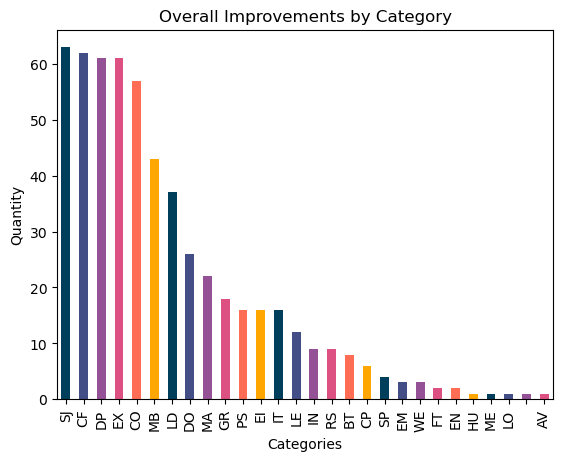

In [36]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('Overall Improvements by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

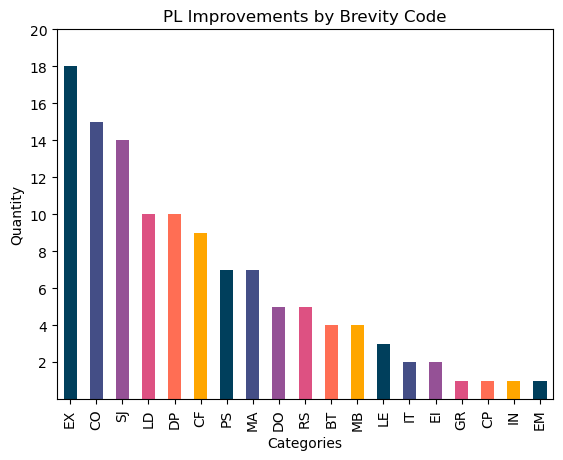

In [37]:
Sus1 = PL_filter['Sustain 1']
Sus2 = PL_filter['Sustain 2']
Sus3 = PL_filter['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = PL_filter['Improve 1']
Imp2 = PL_filter['Improve 2']
Imp3 = PL_filter['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('PL Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.yticks((2,4,6,8,10,12,14,16,18,20))
plt.xlabel('Categories');

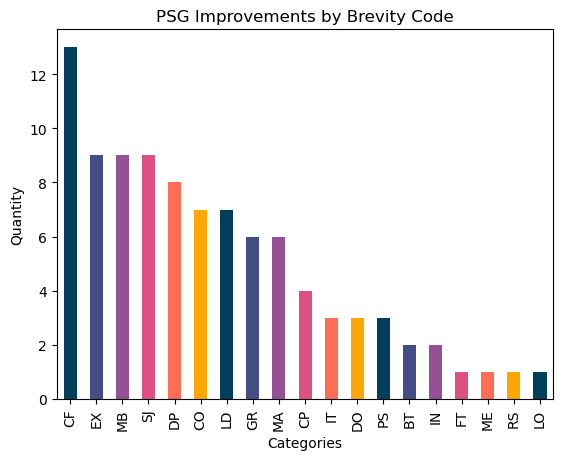

In [38]:
Sus1 = PSG_filter['Sustain 1']
Sus2 = PSG_filter['Sustain 2']
Sus3 = PSG_filter['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = PSG_filter['Improve 1']
Imp2 = PSG_filter['Improve 2']
Imp3 = PSG_filter['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('PSG Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

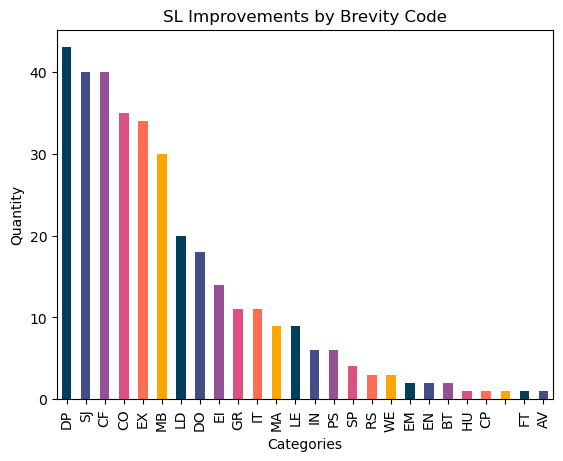

In [39]:
Sus1 = SL_filter['Sustain 1']
Sus2 = SL_filter['Sustain 2']
Sus3 = SL_filter['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = SL_filter['Improve 1']
Imp2 = SL_filter['Improve 2']
Imp3 = SL_filter['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('SL Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<h3> "Decoding" Brevity code

In [40]:

cols = ['Sustain 1', 'Sustain 2', 'Sustain 3', 'Improve 1', 'Improve 2', 'Improve 3']
df[cols] = df[cols].replace(["AV", "EM", "WE", "DP", "HU"], "Character")
df[cols] = df[cols].replace(["MB", "FT", "CF", "RS", "PR"], "Presence") #PR is assumed to mean Presence
df[cols] = df[cols].replace(["MA", "SJ", "IN", "IT", "EX","SR"], "Intellect") #SR was placed into Intellect because it was most common
df[cols] = df[cols].replace(["LD", "BT", "EI", "LE", "CO"], "Lead")
df[cols] = df[cols].replace(["CP", "PS", "DO", "SP"], "Develop")
df[cols] = df[cols].replace(["GR"],"Achieves")
#df

In [41]:
df = pd.read_csv('RunningBlueCard.csv')

<h3> School Sections

In [42]:
df_GSOU = df[df.School == 'GSOU'] # 1. Georgia Southern
df_UF = df[df.School == 'UF']
df_FVSU = df[df.School == 'FVSU']
df_UGA = df[df.School == 'UGA']
df_GTECH = df[df.School == 'GTECH']
df_UNA = df[df.School == 'UNA']
df_AU = df[df.School == 'AU']
df_GSU = df[df.School == 'GSU']

In [43]:
#Organizing Assessments by school
GSOU_grades = df_GSOU['OverallAssessment'].value_counts()
GSOU_grades = GSOU_grades[['E','P','C','U']]

UF_grades = df_UF['OverallAssessment'].value_counts()
UF_grades = UF_grades[['E','P','C']] # Add 'U' back in once there is one

FVSU_grades = df_FVSU['OverallAssessment'].value_counts()
FVSU_grades = FVSU_grades[['E','P','C']] # Add 'U' back in once there is one

UGA_grades = df_UGA['OverallAssessment'].value_counts()
UGA_grades = UGA_grades[['E','P','C']] # Add 'U' back in once there is one

GTECH_grades = df_GTECH['OverallAssessment'].value_counts()
GTECH_grades = GTECH_grades[['E','P','C']] # Add 'U' back in once there is one

UNA_grades = df_UNA['OverallAssessment'].value_counts()
UNA_grades = UNA_grades[['E','P','C']] # Add 'U' back in once there is one

AU_grades = df_AU['OverallAssessment'].value_counts()
AU_grades = AU_grades[['E','P','C']] # Add 'U' back in once there is one

GSU_grades = df_GSU['OverallAssessment'].value_counts()
GSU_grades = GSU_grades[['E','P','C']] # Add 'U' back in once there is one

colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

<h4> AU

<Figure size 800x600 with 0 Axes>

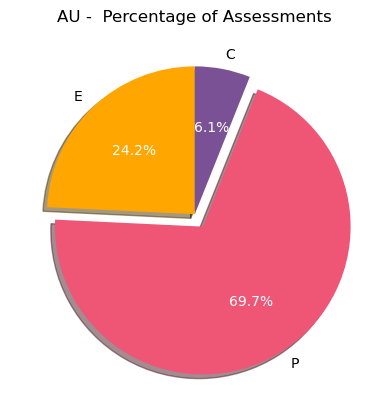

In [44]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(AU_grades,labels = AU_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('AU -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

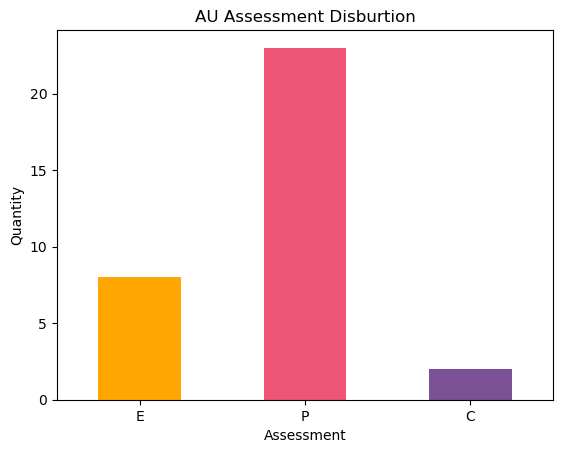

In [45]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
AU_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('AU Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [46]:
#Position v Grade
pos_grades = df_AU.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades

OverallAssessment,E,P,C
RatedPos,,,
PL,2.0,2.0,1.0
PSG,4.0,6.0,NaN
SL,2.0,15.0,1.0


Text(0.5, 1.0, 'Assessment by Position')

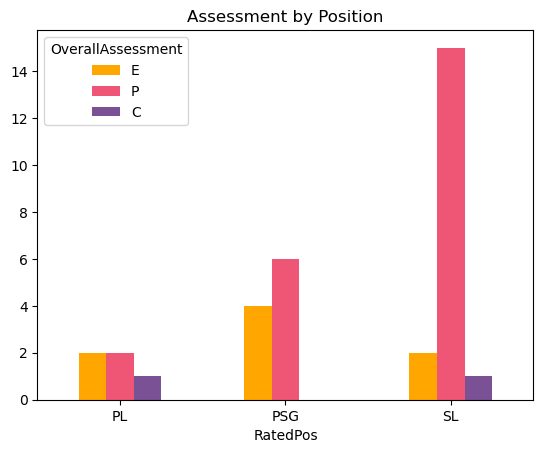

In [47]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

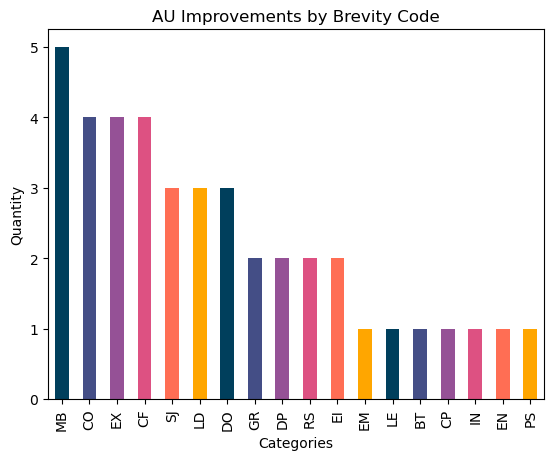

In [48]:
Sus1 = df_AU['Sustain 1']
Sus2 = df_AU['Sustain 2']
Sus3 = df_AU['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_AU['Improve 1']
Imp2 = df_AU['Improve 2']
Imp3 = df_AU['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('AU Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

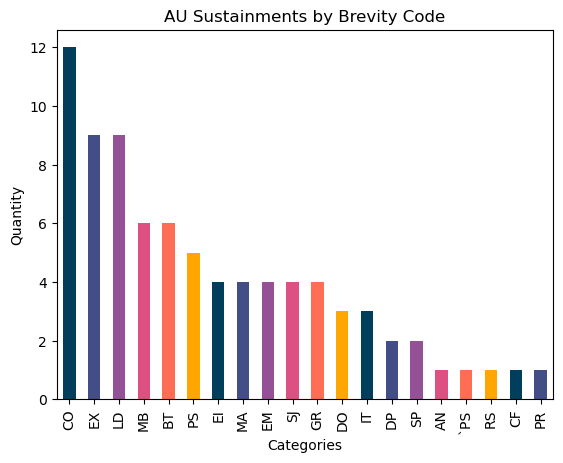

In [49]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('AU Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

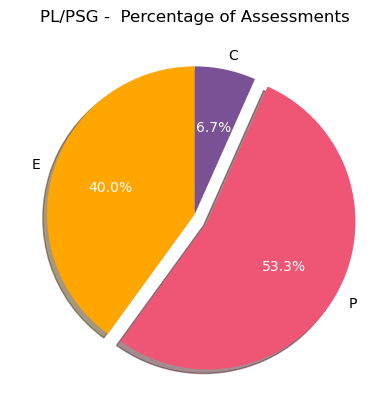

In [50]:
PL_PSG_filter = df_AU[ (df_AU['RatedPos'] == 'PL') | (df_AU['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C']]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

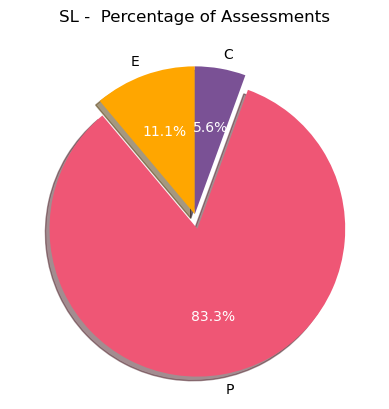

In [51]:
SL_filter = df_AU[df_AU['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> GSOU

<Figure size 800x600 with 0 Axes>

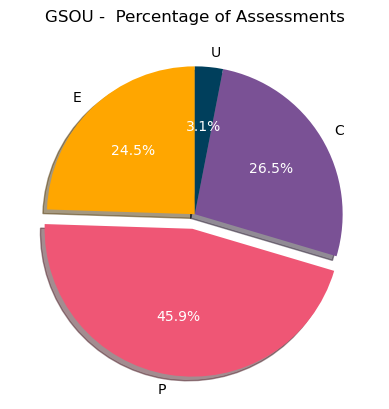

In [52]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,0)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(GSOU_grades,labels = GSOU_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('GSOU -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

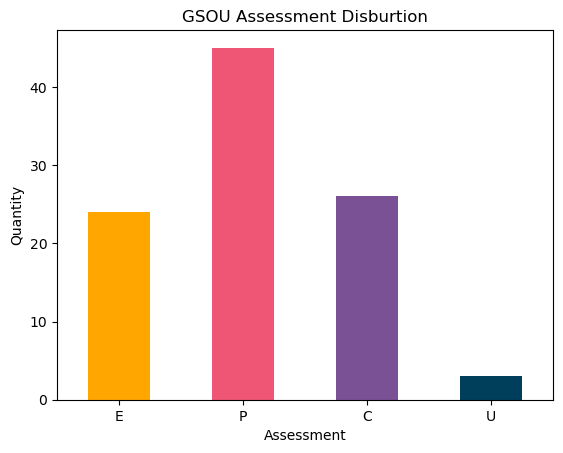

In [53]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
GSOU_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('GSOU Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [54]:
#Position v Grade
pos_grades = df_GSOU.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C','U']] # add 'U'
pos_grades

OverallAssessment,E,P,C,U
RatedPos,,,,
PL,6.0,9.0,8.0,1.0
PSG,3.0,10.0,5.0,2.0
SL,15.0,26.0,13.0,NaN


Text(0.5, 1.0, 'Assessment by Position')

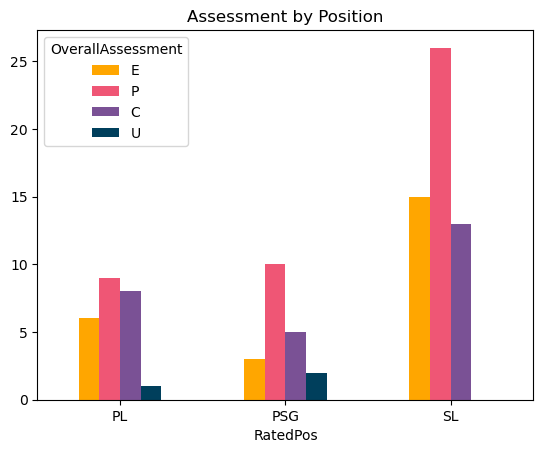

In [55]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

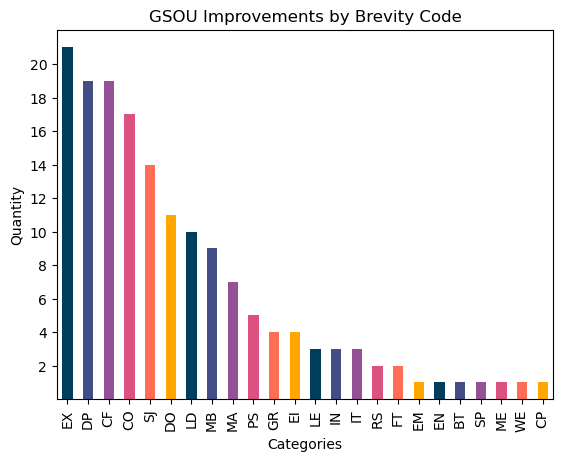

In [56]:
Sus1 = df_GSOU['Sustain 1']
Sus2 = df_GSOU['Sustain 2']
Sus3 = df_GSOU['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_GSOU['Improve 1']
Imp2 = df_GSOU['Improve 2']
Imp3 = df_GSOU['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('GSOU Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.yticks((2,4,6,8,10,12,14,16,18,20))
plt.xlabel('Categories');

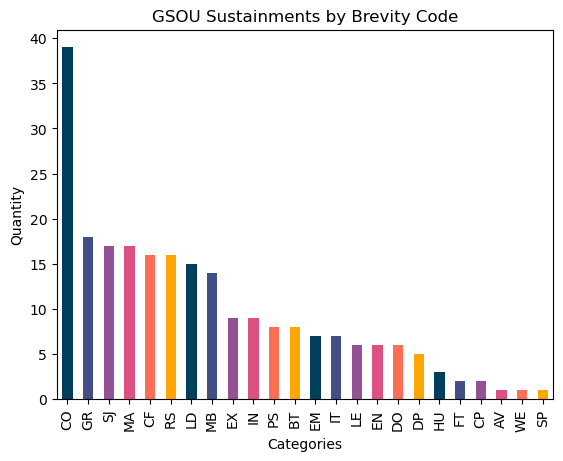

In [57]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('GSOU Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

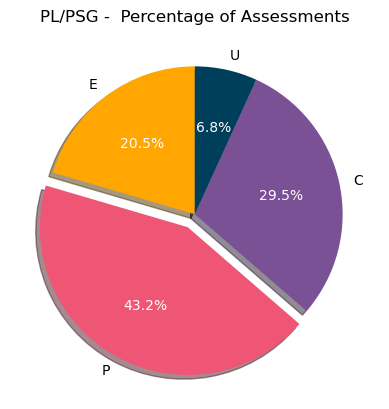

In [58]:
PL_PSG_filter = df_GSOU[ (df_GSOU['RatedPos'] == 'PL') | (df_GSOU['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C','U']]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,0) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

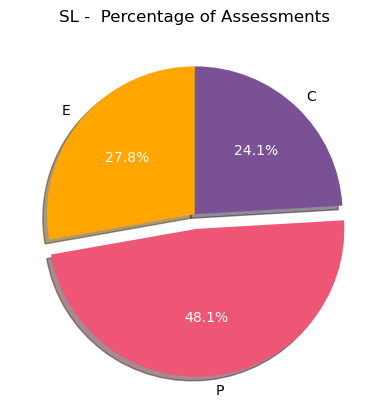

In [59]:
SL_filter = df_GSOU[df_GSOU['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> UGA

<Figure size 800x600 with 0 Axes>

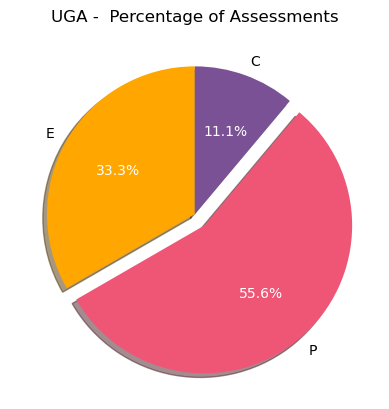

In [60]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add U
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(UGA_grades,labels = UGA_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('UGA -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

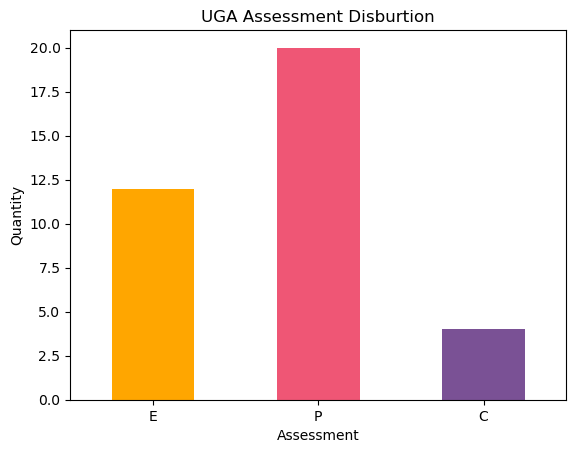

In [61]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
UGA_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('UGA Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [62]:
#Position v Grade
pos_grades = df_UGA.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades

OverallAssessment,E,P,C
RatedPos,,,
PL,1,1,1
PSG,7,5,2
SL,4,14,1


Text(0.5, 1.0, 'Assessment by Position')

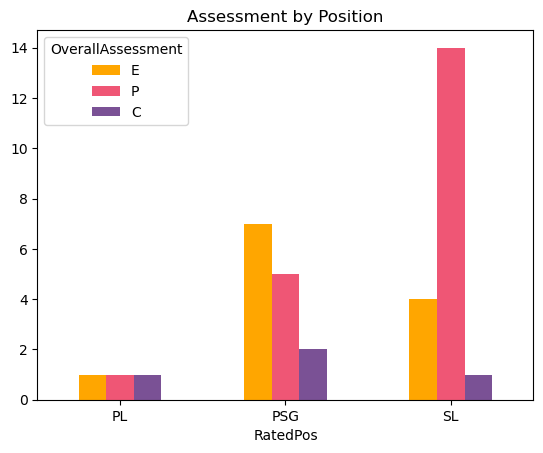

In [63]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

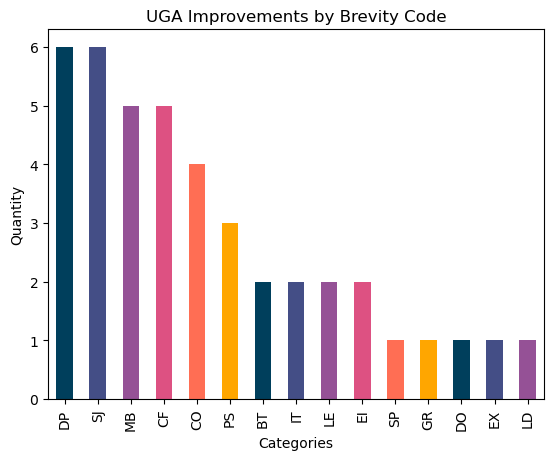

In [64]:
Sus1 = df_UGA['Sustain 1']
Sus2 = df_UGA['Sustain 2']
Sus3 = df_UGA['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_UGA['Improve 1']
Imp2 = df_UGA['Improve 2']
Imp3 = df_UGA['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('UGA Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

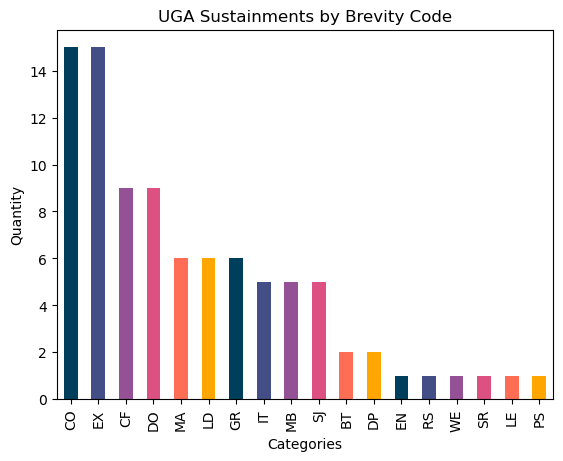

In [65]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('UGA Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

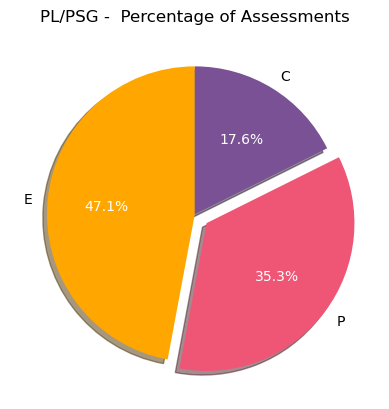

In [66]:
PL_PSG_filter = df_UGA[ (df_UGA['RatedPos'] == 'PL') | (df_UGA['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C']]

plt.figure(figsize=(8,6));
explode = (0,0.1,0) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

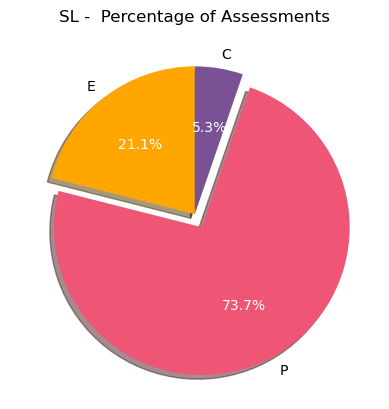

In [67]:
SL_filter = df_UGA[df_UGA['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> GSU

<Figure size 800x600 with 0 Axes>

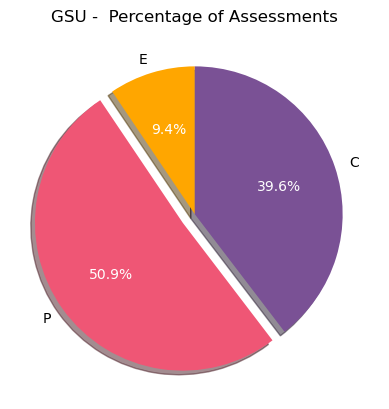

In [68]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(GSU_grades,labels = GSU_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('GSU -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

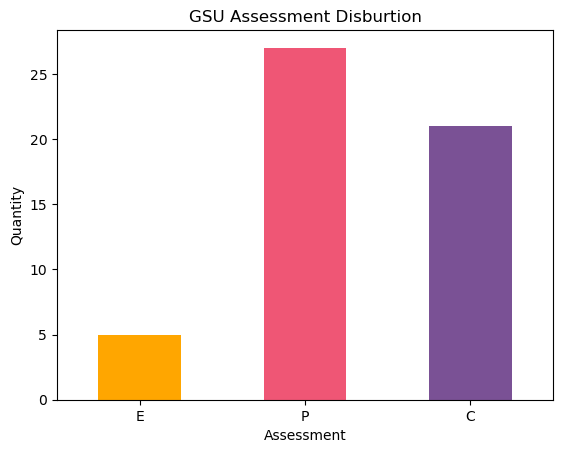

In [69]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
GSU_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('GSU Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [70]:
#Position v Grade
pos_grades = df_GSU.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades

OverallAssessment,E,P,C
RatedPos,,,
PL,3.0,5.0,5.0
PSG,NaN,7.0,NaN
SL,2.0,15.0,16.0


Text(0.5, 1.0, 'Assessment by Position')

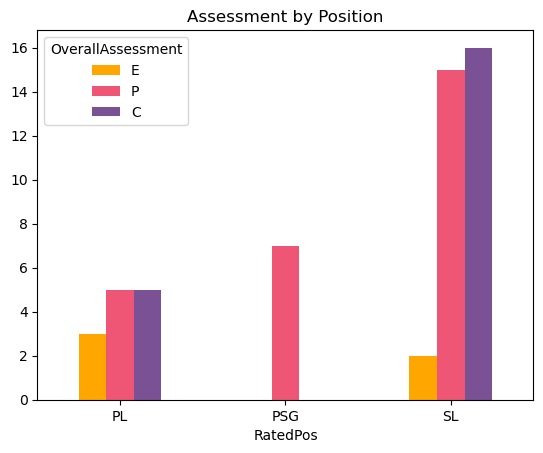

In [71]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

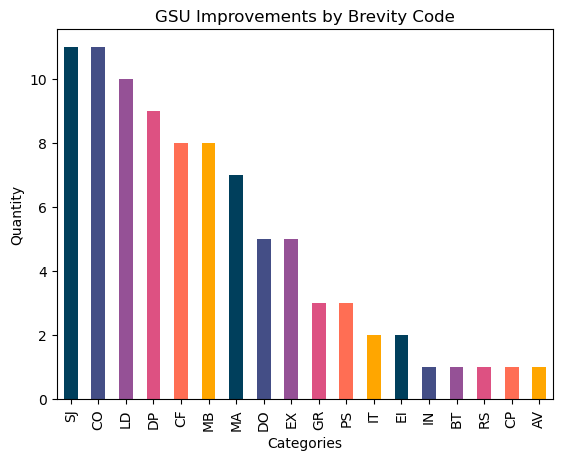

In [72]:
Sus1 = df_GSU['Sustain 1']
Sus2 = df_GSU['Sustain 2']
Sus3 = df_GSU['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_GSU['Improve 1']
Imp2 = df_GSU['Improve 2']
Imp3 = df_GSU['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('GSU Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

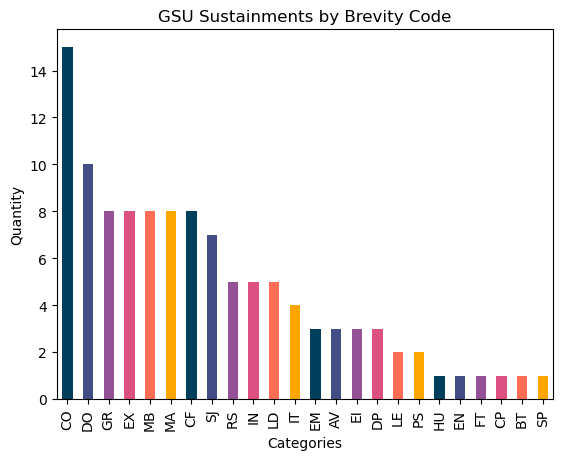

In [73]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('GSU Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

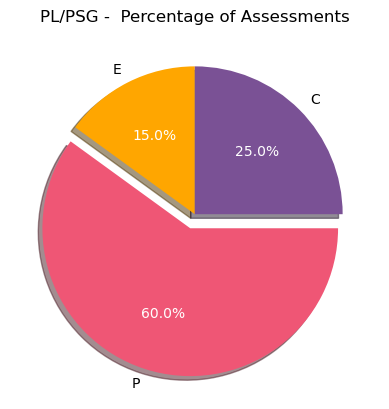

In [74]:
PL_PSG_filter = df_GSU[ (df_GSU['RatedPos'] == 'PL') | (df_GSU['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C']]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

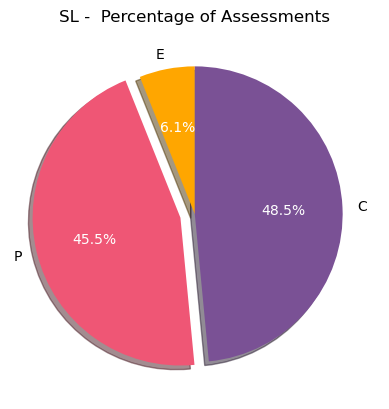

In [75]:
SL_filter = df_GSU[df_GSU['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> GTECH

<Figure size 800x600 with 0 Axes>

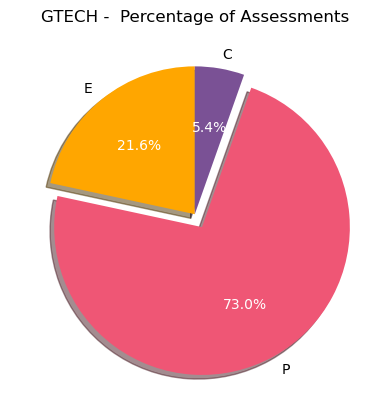

In [76]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(GTECH_grades,labels = GTECH_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('GTECH -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

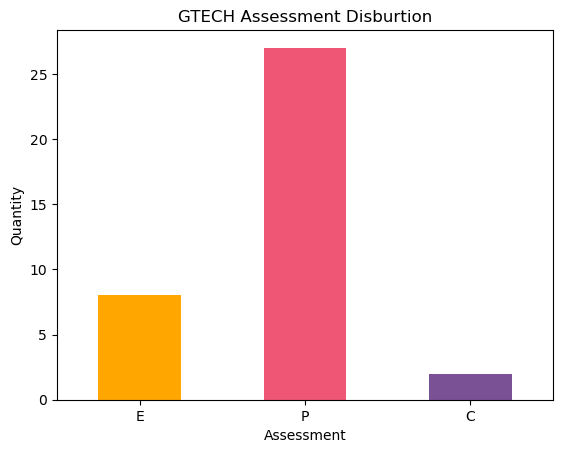

In [77]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
GTECH_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('GTECH Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [78]:
#Position v Grade
pos_grades = df_GTECH.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades

OverallAssessment,E,P,C
RatedPos,,,
PL,3.0,4.0,1.0
PSG,1.0,6.0,NaN
SL,4.0,17.0,1.0


Text(0.5, 1.0, 'Assessment by Position')

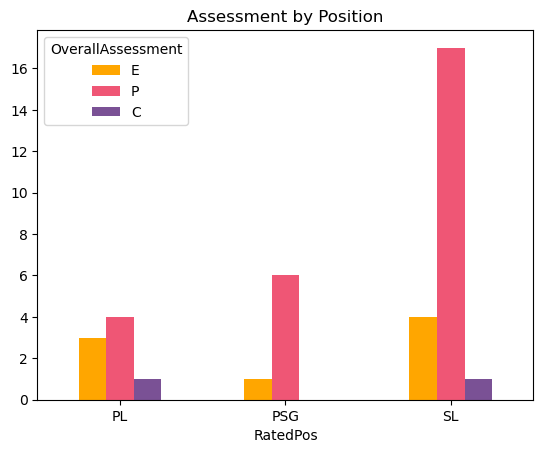

In [79]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

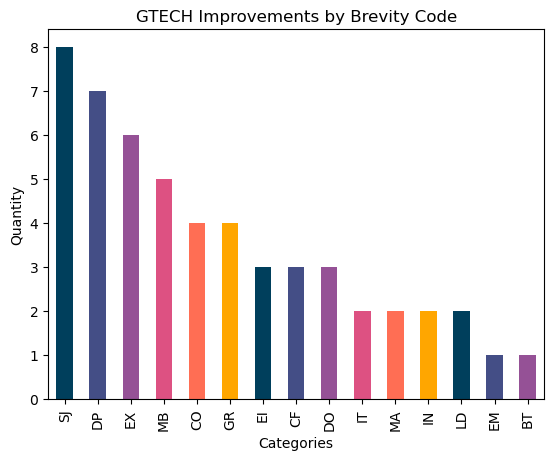

In [80]:
Sus1 = df_GTECH['Sustain 1']
Sus2 = df_GTECH['Sustain 2']
Sus3 = df_GTECH['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_GTECH['Improve 1']
Imp2 = df_GTECH['Improve 2']
Imp3 = df_GTECH['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('GTECH Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

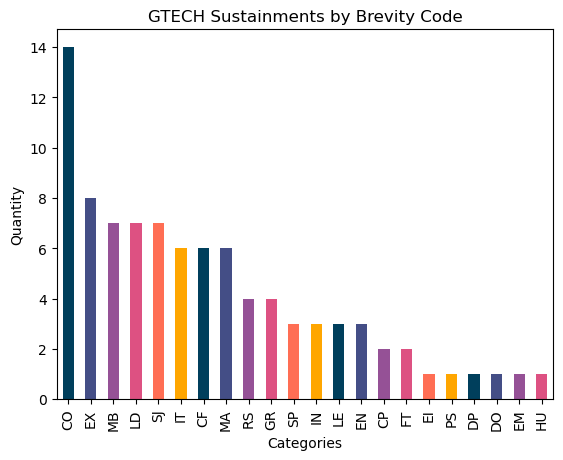

In [81]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('GTECH Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

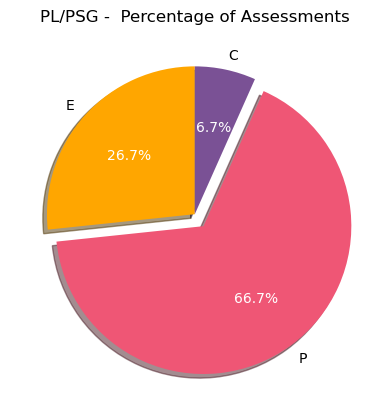

In [82]:
PL_PSG_filter = df_GTECH[ (df_GTECH['RatedPos'] == 'PL') | (df_GTECH['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

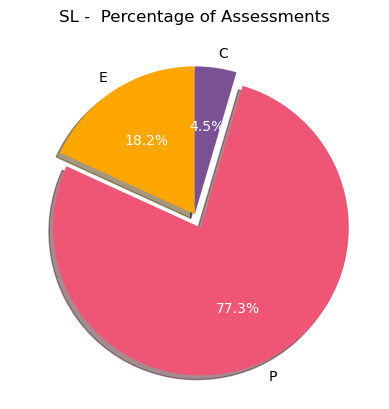

In [83]:
SL_filter = df_GTECH[df_GTECH['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> UF

<Figure size 800x600 with 0 Axes>

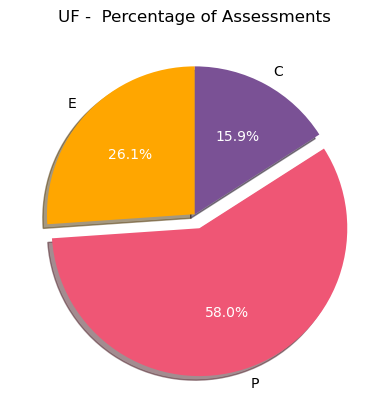

In [84]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(UF_grades,labels = UF_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('UF -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

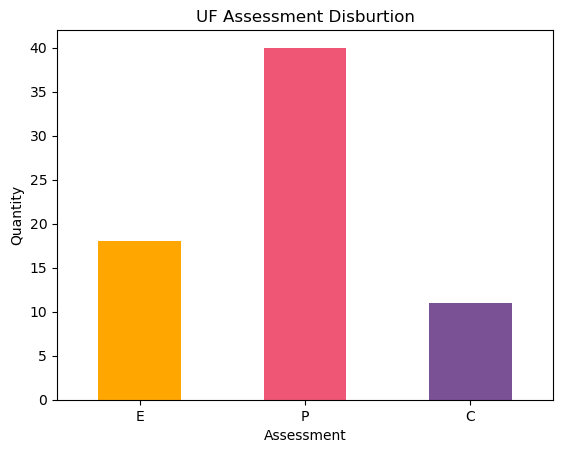

In [85]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
UF_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('UF Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [86]:
#Position v Grade
pos_grades = df_UF.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades

OverallAssessment,E,P,C
RatedPos,,,
PL,3,7,1
PSG,6,11,3
SL,9,22,7


Text(0.5, 1.0, 'Assessment by Position')

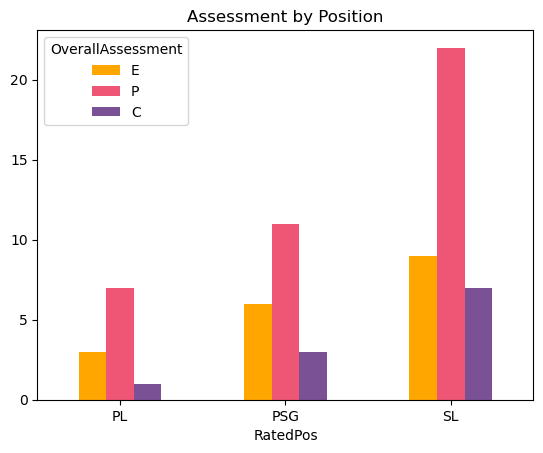

In [87]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

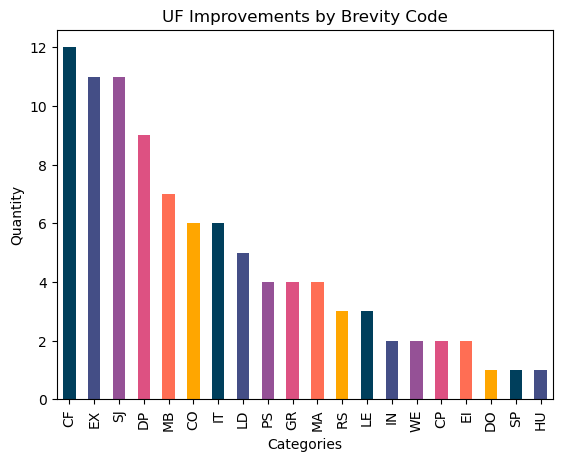

In [88]:
Sus1 = df_UF['Sustain 1']
Sus2 = df_UF['Sustain 2']
Sus3 = df_UF['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_UF['Improve 1']
Imp2 = df_UF['Improve 2']
Imp3 = df_UF['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('UF Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

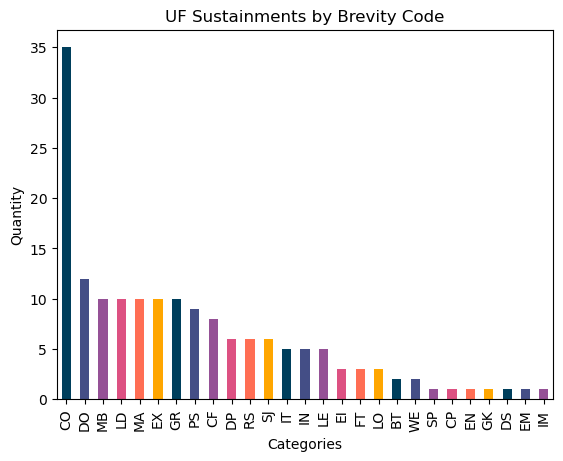

In [89]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('UF Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

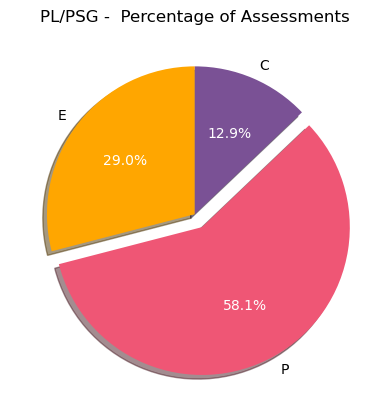

In [90]:
PL_PSG_filter = df_UF[ (df_UF['RatedPos'] == 'PL') | (df_UF['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

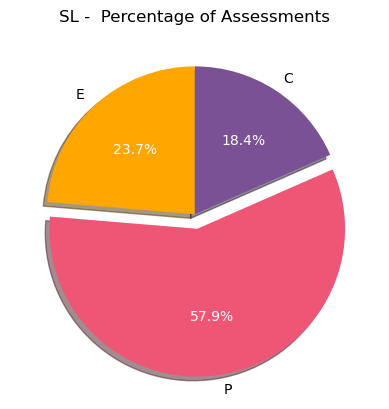

In [91]:
SL_filter = df_UF[df_UF['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4>  UNA

<Figure size 800x600 with 0 Axes>

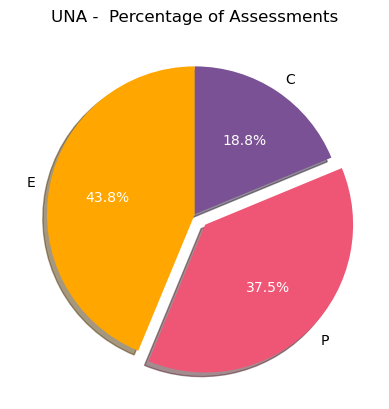

In [92]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(UNA_grades,labels = UNA_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('UNA -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

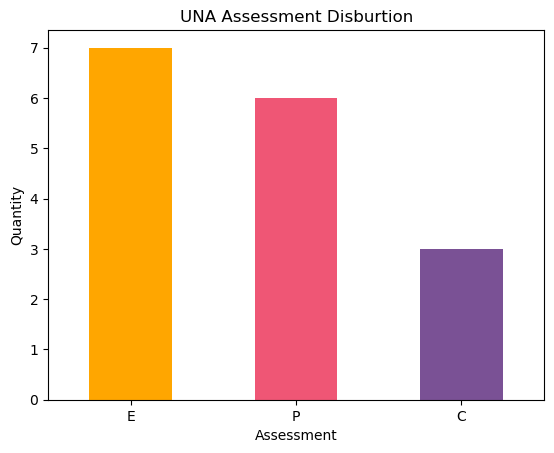

In [93]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
UNA_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('UNA Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [94]:
#Position v Grade
pos_grades = df_UNA.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades.T

RatedPos,PL,PSG,SL
OverallAssessment,,,
E,3.0,1.0,3.0
P,2.0,NaN,4.0
C,1.0,NaN,2.0


([<matplotlib.axis.YTick at 0x7f7d7889aa00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

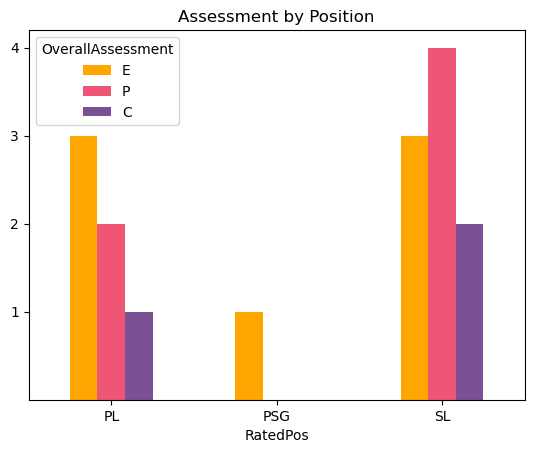

In [95]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')
plt.yticks((1,2,3,4))

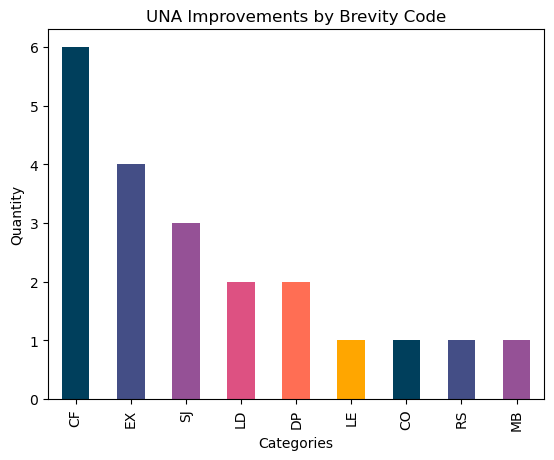

In [96]:
Sus1 = df_UNA['Sustain 1']
Sus2 = df_UNA['Sustain 2']
Sus3 = df_UNA['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_UNA['Improve 1']
Imp2 = df_UNA['Improve 2']
Imp3 = df_UNA['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('UNA Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

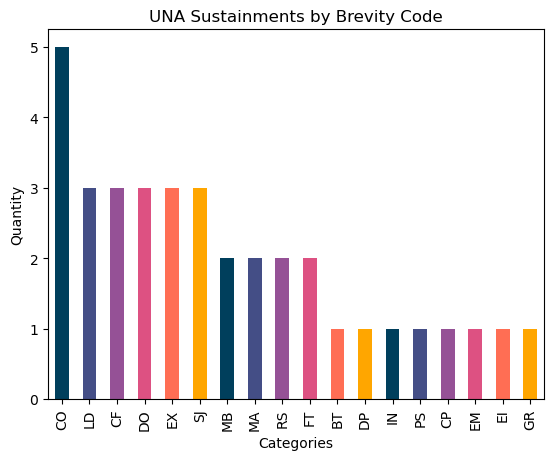

In [97]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('UNA Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

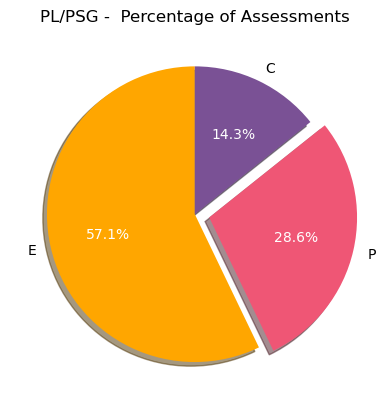

In [98]:
PL_PSG_filter = df_UNA[ (df_UNA['RatedPos'] == 'PL') | (df_UNA['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

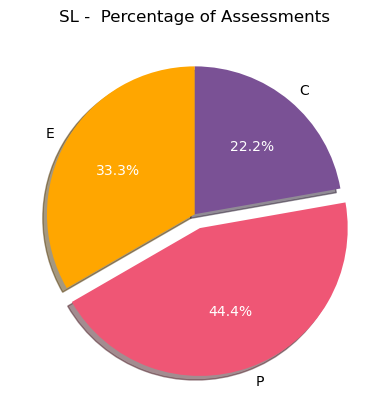

In [99]:
SL_filter = df_UNA[df_UNA['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h4> FVSU

<Figure size 800x600 with 0 Axes>

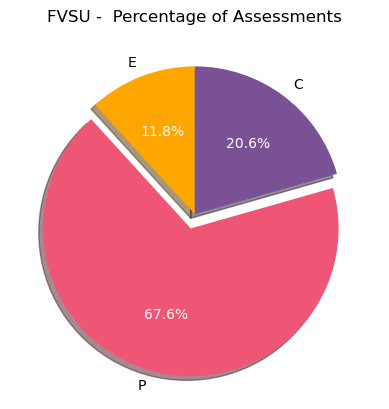

In [100]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(FVSU_grades,labels = FVSU_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('FVSU -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

Text(0, 0.5, 'Quantity')

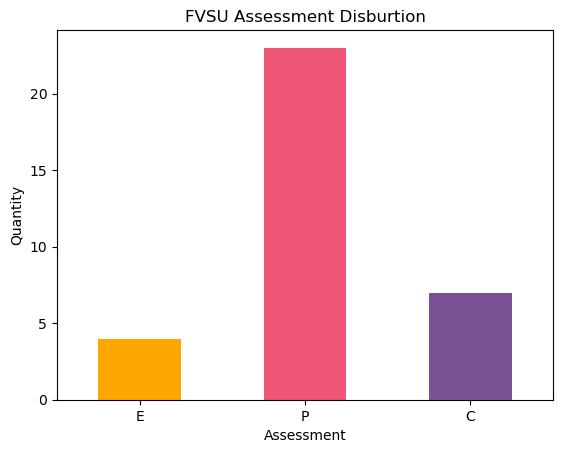

In [101]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
FVSU_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('FVSU Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

In [102]:
#Position v Grade
pos_grades = df_FVSU.groupby('RatedPos')['OverallAssessment'].value_counts()
pos_grades = pos_grades.unstack(level=1)
pos_grades = pos_grades[['E','P','C']] # add 'U'
pos_grades.T

RatedPos,PL,PSG,SL
OverallAssessment,,,
E,1,1,2
P,10,3,10
C,1,2,4


Text(0.5, 1.0, 'Assessment by Position')

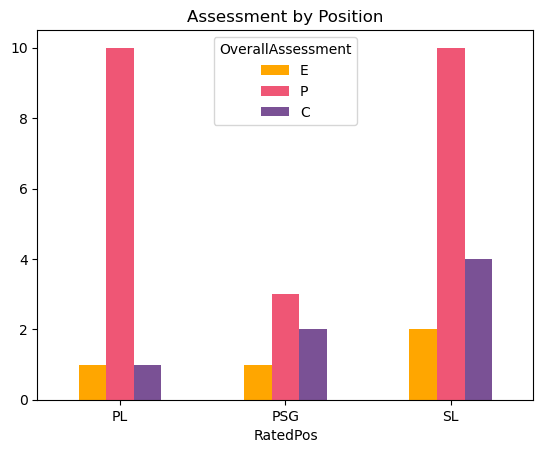

In [103]:
pos_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment by Position')

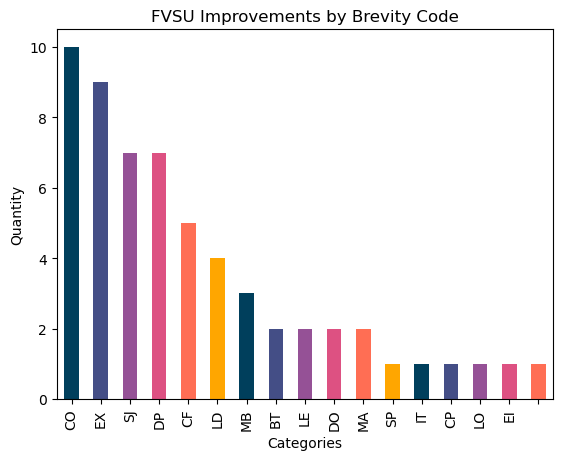

In [104]:
Sus1 = df_FVSU['Sustain 1']
Sus2 = df_FVSU['Sustain 2']
Sus3 = df_FVSU['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_FVSU['Improve 1']
Imp2 = df_FVSU['Improve 2']
Imp3 = df_FVSU['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Imp.value_counts().plot(kind='bar', color = colors)
plt.title('FVSU Improvements by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

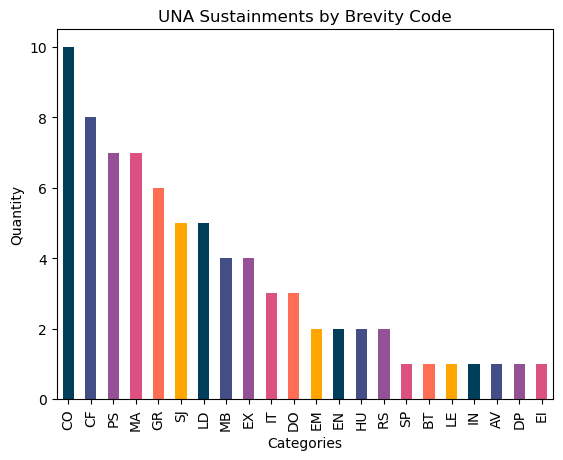

In [105]:
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
Sus.value_counts().plot(kind='bar', color = colors)
plt.title('UNA Sustainments by Brevity Code');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

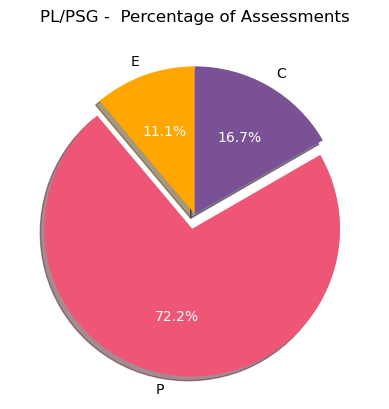

In [106]:
PL_PSG_filter = df_FVSU[ (df_FVSU['RatedPos'] == 'PL') | (df_FVSU['RatedPos'] == 'PSG')]
PL_PSG_grades = PL_PSG_filter['OverallAssessment'].value_counts()
PL_PSG_grades = PL_PSG_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(PL_PSG_grades,labels = PL_PSG_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('PL/PSG -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<Figure size 800x600 with 0 Axes>

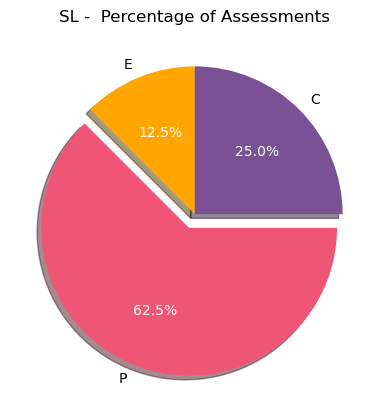

In [107]:
SL_filter = df_FVSU[df_FVSU['RatedPos'] == 'SL']
SL_grades = SL_filter['OverallAssessment'].value_counts()
SL_grades = SL_grades[['E','P','C',]]

plt.figure(figsize=(8,6));
explode = (0,0.1,0,) #add 0 later
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(SL_grades,labels = SL_grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('SL -  Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h3> Bar and Line Graph for by school, by position

<h4> PL

<Figure size 2500x500 with 0 Axes>

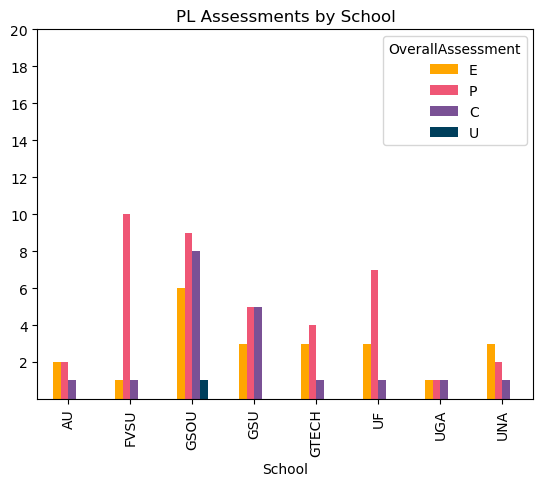

In [108]:
school_grades = PL_filter.groupby('School')['OverallAssessment'].value_counts()
school_grades = school_grades.unstack(level=1)
school_grades = school_grades[['E','P','C','U']]
school_grades
plt.figure(figsize=(25,5))
school_grades.plot(kind='bar', color = colors);
plt.yticks((2,4,6,8,10,12,14,16,18,20));
plt.title('PL Assessments by School');

In [109]:
school_grades = school_grades.fillna(0)
school_grades['Sum'] = school_grades.sum(axis=1)
school_grades = (school_grades.div(school_grades['Sum'],axis = 0) * 100)
school_grades

OverallAssessment,E,P,C,U,Sum
School,,,,,
AU,40.000000,40.000000,20.000000,0.000000,100.0
FVSU,8.333333,83.333333,8.333333,0.000000,100.0
GSOU,25.000000,37.500000,33.333333,4.166667,100.0
GSU,23.076923,38.461538,38.461538,0.000000,100.0
GTECH,37.500000,50.000000,12.500000,0.000000,100.0
UF,27.272727,63.636364,9.090909,0.000000,100.0
UGA,33.333333,33.333333,33.333333,0.000000,100.0
UNA,50.000000,33.333333,16.666667,0.000000,100.0


In [110]:
school_grades = school_grades.drop(['Sum'], axis=1)

In [111]:
school_grades = school_grades.T
school_grades

School,AU,FVSU,GSOU,GSU,GTECH,UF,UGA,UNA
OverallAssessment,,,,,,,,
E,40.0,8.333333,25.000000,23.076923,37.5,27.272727,33.333333,50.000000
P,40.0,83.333333,37.500000,38.461538,50.0,63.636364,33.333333,33.333333
C,20.0,8.333333,33.333333,38.461538,12.5,9.090909,33.333333,16.666667
U,0.0,0.000000,4.166667,0.000000,0.0,0.000000,0.000000,0.000000


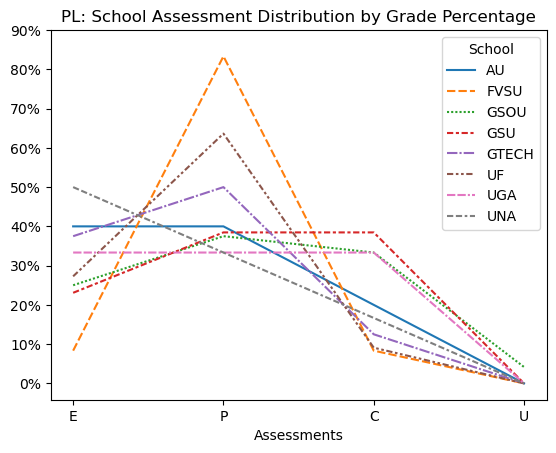

In [112]:
school_line = sns.lineplot(data = school_grades);
school_line.set_yticks([0,10,20,30,40,50,60,70,80,90]);
school_line.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%']);
school_line.set(xlabel = 'Assessments', title = 'PL: School Assessment Distribution by Grade Percentage');

<h4> PSG

<Figure size 2500x500 with 0 Axes>

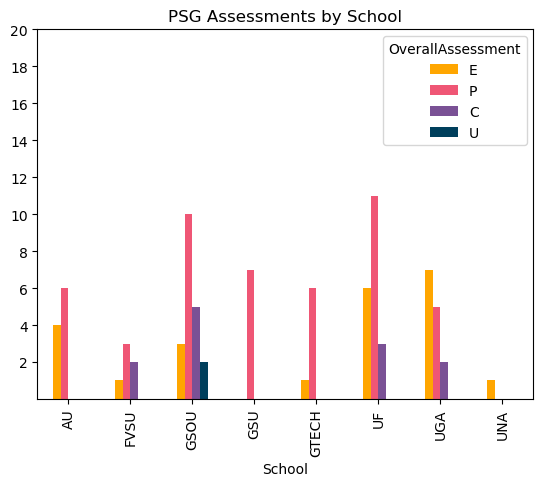

In [113]:
school_grades = PSG_filter.groupby('School')['OverallAssessment'].value_counts()
school_grades = school_grades.unstack(level=1)
school_grades = school_grades[['E','P','C','U']]
school_grades
plt.figure(figsize=(25,5))
school_grades.plot(kind='bar', color = colors);
plt.yticks((2,4,6,8,10,12,14,16,18,20));
plt.title('PSG Assessments by School');

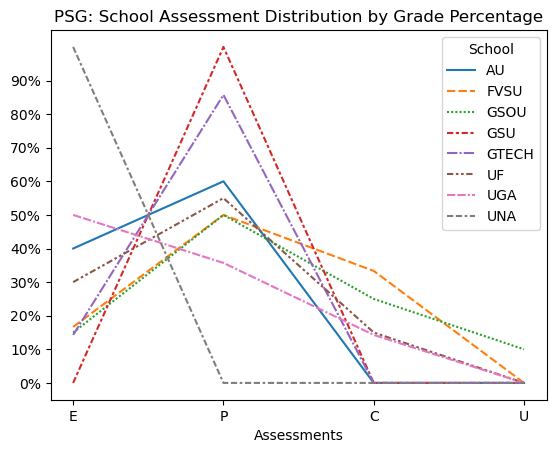

In [114]:
school_grades = school_grades.fillna(0)
school_grades['Sum'] = school_grades.sum(axis=1)
school_grades = (school_grades.div(school_grades['Sum'],axis = 0) * 100)
school_grades = school_grades.drop(['Sum'], axis=1)
school_grades = school_grades.T
school_line = sns.lineplot(data = school_grades);
school_line.set_yticks([0,10,20,30,40,50,60,70,80,90]);
school_line.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%']);
school_line.set(xlabel = 'Assessments', title = 'PSG: School Assessment Distribution by Grade Percentage');

<h3> SL 

<Figure size 2500x500 with 0 Axes>

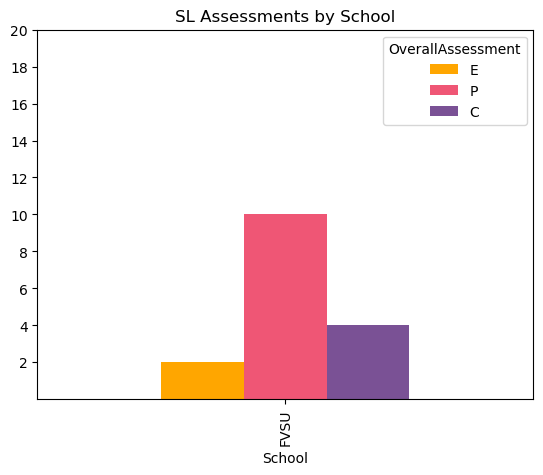

In [115]:
school_grades = SL_filter.groupby('School')['OverallAssessment'].value_counts()
school_grades = school_grades.unstack(level=1)
school_grades = school_grades[['E','P','C']] #add U later
school_grades
plt.figure(figsize=(25,5))
school_grades.plot(kind='bar', color = colors);
plt.yticks((2,4,6,8,10,12,14,16,18,20));
plt.title('SL Assessments by School');

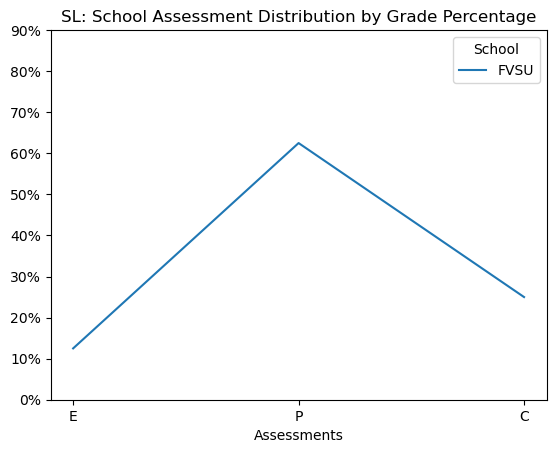

In [116]:
school_grades = school_grades.fillna(0)
school_grades['Sum'] = school_grades.sum(axis=1)
school_grades = (school_grades.div(school_grades['Sum'],axis = 0) * 100)
school_grades = school_grades.drop(['Sum'], axis=1)
school_grades = school_grades.T
school_line = sns.lineplot(data = school_grades);
school_line.set_yticks([0,10,20,30,40,50,60,70,80,90]);
school_line.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%']);
school_line.set(xlabel = 'Assessments', title = 'SL: School Assessment Distribution by Grade Percentage');